In [59]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-msdautse
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-msdautse
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=267012 sha256=23e6a5b9be44feb3b8b28fd3af41bf8d34237fcea2bf593807ffae79969df530
  Stored in directory: /tmp/pip-ephem-wheel-cache-g0cxtb2_/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0


1.5.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [60]:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html


In [61]:
from google.colab import drive 
from google.colab import files
import pandas
drive.mount('/content/drive',force_remount=True) 
files.download('/project.zip')  
!unzip project.zip
df_train=pandas.read_csv('/content/drive/My Drive/Datasets/project/train_csv1.csv') 
df_train


Mounted at /content/drive
unzip:  cannot find or open project.zip, project.zip.zip or project.zip.ZIP.


,filename,width,height,class,xmin,ymin,xmax,ymax
0,us1.bmp,95,75,benign,17,7,70,62
1,us2.bmp,95,75,benign,18,11,66,60
2,us3.bmp,95,75,benign,17,11,72,67
3,us4.bmp,95,75,benign,20,9,74,68
4,us5.bmp,95,75,benign,14,9,80,64
5,us6.bmp,123,69,benign,25,16,89,52
6,us7.bmp,123,69,benign,31,16,96,51
7,us8.bmp,123,69,benign,32,15,88,54
8,us9.bmp,123,69,benign,29,14,95,59
9,us10.bmp,123,69,benign,25,15,83,49


In [0]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow 
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [0]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
import itertools
import cv2 
import pandas as pd

def get_project_dicts(csv_file, img_dir):
    df = pd.read_csv(csv_file)
    df['filename'] = df['filename'].map(lambda x: img_dir+x)

    classes = ['benign', 'malignant']

    df['class_int'] = df['class'].map(lambda x: classes.index(x))

    dataset_dicts = []
    for filename in df['filename'].unique().tolist():
        record = {}
        
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["height"] = height
        record["width"] = width

        objs = []
        for index, row in df[(df['filename']==filename)].iterrows():
          obj= {
              'bbox': [row['xmin'], row['ymin'], row['xmax'], row['ymax']],
              'bbox_mode': BoxMode.XYXY_ABS,
              'category_id': row['class_int'],
              "iscrowd": 0
          }
          objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

In [64]:
from detectron2.data import DatasetCatalog, MetadataCatalog

classes = ['benign', 'malignant']

for d in ["train", "test"]:
  DatasetCatalog.register('BreastCancer_detect/' + d, lambda d=d: get_project_dicts('/content/drive/My Drive/Datasets/project/' + d + '_csv1.csv', '/content/drive/My Drive/Datasets/project/' + d+'/'))
  MetadataCatalog.get('BreastCancer_detect/' + d).set(thing_classes=classes)
BreastCancer_detect_metadata = MetadataCatalog.get('BreastCancer_detect/train')

AssertionError: ignored

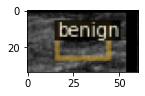

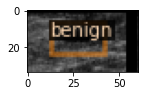

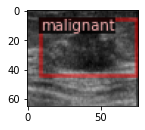

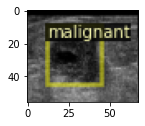

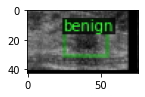

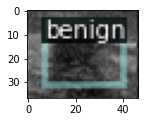

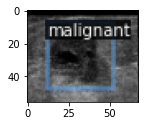

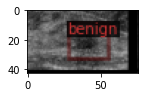

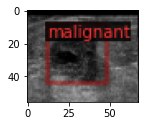

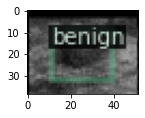

In [65]:
import random
from detectron2.utils.visualizer import Visualizer 
import matplotlib.pyplot as plt 
from google.colab import files 
files.download('/project.zip')  
dataset_dicts = get_project_dicts('/content/drive/My Drive/Datasets/project/train_csv1.csv', '/content/drive/My Drive/Datasets/project/train/')
for d in random.sample(dataset_dicts, 10):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1],BreastCancer_detect_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (2, 4))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

In [66]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg 
cfg = get_cfg()
print(cfg)

CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  FILTER_EMPTY_ANNOTATIONS: True
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ()
  TRAIN: ()
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (800,)
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES: [[32, 64, 128, 256, 512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_backbone
  DEVICE: cuda
  FPN:
    FUSE_TYPE: sum
    IN_FEATURES: []
    NORM: 
    OUT_CHANNELS: 256
  KEYPOINT_ON: False
  LOAD_PROPOSALS: False
  MASK_ON: False
  META_

In [67]:
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")) 
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
print(cfg.MODEL)


ANCHOR_GENERATOR:
  ANGLES: [[-90, 0, 90]]
  ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
  NAME: DefaultAnchorGenerator
  OFFSET: 0.0
  SIZES: [[32], [64], [128], [256], [512]]
BACKBONE:
  FREEZE_AT: 2
  NAME: build_resnet_fpn_backbone
DEVICE: cuda
FPN:
  FUSE_TYPE: sum
  IN_FEATURES: ['res2', 'res3', 'res4', 'res5']
  NORM: 
  OUT_CHANNELS: 256
KEYPOINT_ON: False
LOAD_PROPOSALS: False
MASK_ON: False
META_ARCHITECTURE: GeneralizedRCNN
PANOPTIC_FPN:
  COMBINE:
    ENABLED: True
    INSTANCES_CONFIDENCE_THRESH: 0.5
    OVERLAP_THRESH: 0.5
    STUFF_AREA_LIMIT: 4096
  INSTANCE_LOSS_WEIGHT: 1.0
PIXEL_MEAN: [103.53, 116.28, 123.675]
PIXEL_STD: [1.0, 1.0, 1.0]
PROPOSAL_GENERATOR:
  MIN_SIZE: 0
  NAME: RPN
RESNETS:
  DEFORM_MODULATED: False
  DEFORM_NUM_GROUPS: 1
  DEFORM_ON_PER_STAGE: [False, False, False, False]
  DEPTH: 101
  NORM: FrozenBN
  NUM_GROUPS: 1
  OUT_FEATURES: ['res2', 'res3', 'res4', 'res5']
  RES2_OUT_CHANNELS: 256
  RES5_DILATION: 1
  STEM_OUT_CHANNELS: 64
  STRIDE_IN_1X1: True
  WIDTH

In [68]:
cfg = get_cfg()

cfg.DATASETS.TRAIN = ('BreastCancer_detect/train',)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2  


cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[06/15 07:22:43 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

In [0]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ('BreastCancer_detect/test', )
predictor = DefaultPredictor(cfg)


In [70]:
df_test = pd.read_csv('/content/drive/My Drive/Datasets/project/test_csv1.csv') 
df_test 


,filename,width,height,class,xmin,ymin,xmax,ymax
0,us21.bmp,93,57,benign,17,8,69,48
1,us22.bmp,93,57,benign,25,9,75,47
2,us23.bmp,93,57,benign,24,8,71,47
3,us24.bmp,93,57,benign,24,8,69,44
4,us25.bmp,93,57,benign,24,9,68,50
5,us26.bmp,95,75,benign,10,12,80,69
6,us27.bmp,95,75,benign,12,8,72,67
7,us28.bmp,95,75,benign,18,13,75,63
8,us29.bmp,95,75,benign,13,11,75,63
9,us30.bmp,95,75,benign,16,10,77,61


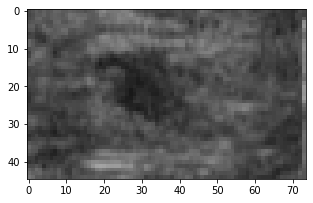

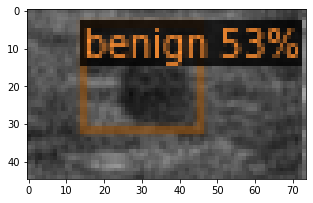

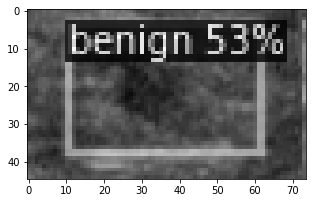

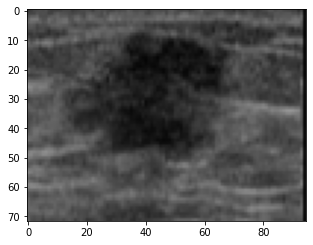

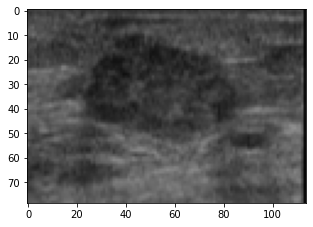

In [72]:
from detectron2.utils.visualizer import ColorMode 
import random
dataset_dicts =  get_project_dicts('/content/drive/My Drive/Datasets/project/test_csv1.csv', '/content/drive/My Drive/Datasets/project/test/')
for d in random.sample(dataset_dicts, 5):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=BreastCancer_detect_metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (5, 6)) 
    
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()





--2020-06-15 07:57:16--  https://www.ultrasoundcases.info/clients/ultrasoundcases/uploads/lbox_25695.jpg
Resolving www.ultrasoundcases.info (www.ultrasoundcases.info)... 165.22.18.86
Connecting to www.ultrasoundcases.info (www.ultrasoundcases.info)|165.22.18.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31037 (30K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>]  30.31K  --.-KB/s    in 0s      

2020-06-15 07:57:18 (308 MB/s) - ‘input.jpg’ saved [31037/31037]



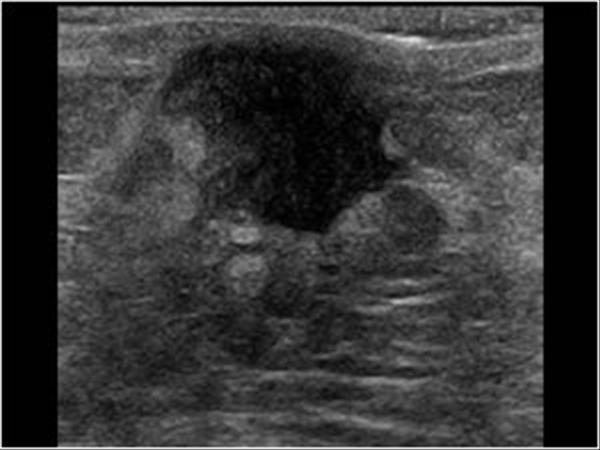

In [73]:
!wget https://www.ultrasoundcases.info/clients/ultrasoundcases/uploads/lbox_25695.jpg -O input.jpg
img = cv2.imread("./input.jpg")
cv2_imshow(img)
 

In [74]:
predictor = DefaultPredictor(cfg)
predictor
print(cfg.DATASETS) 


PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
PROPOSAL_FILES_TEST: ()
PROPOSAL_FILES_TRAIN: ()
TEST: ('BreastCancer_detect/test',)
TRAIN: ('BreastCancer_detect/train',)


from detectron2.utils.visualizer import ColorMode 
import random
dataset_dicts = get_project_dicts('/content/drive/My Drive/Datasets/project/test_csv1.csv', '/content/drive/My Drive/Datasets/project/test/')
for d in random.sample(dataset_dicts, 5):    
    img= cv2.imread(d["file_name"])
    outputs = predictor(img)
    v = Visualizer(img[:, :, ::-1], metadata=BreastCancer_detect_metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    #plt.figure(figsize = (4, 5))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    #plt.show()

In [75]:
print(MetadataCatalog.get(cfg.DATASETS.TRAIN[0])) 

Metadata(name='BreastCancer_detect/train', thing_classes=['benign', 'malignant'])


In [76]:
outputs = predictor(img)
print(outputs) 


{'instances': Instances(num_instances=3, image_height=450, image_width=600, fields=[pred_boxes: Boxes(tensor([[ 42.7262, 166.8393, 548.3253, 426.8961],
        [ 53.9435,  71.6033, 505.8576, 283.7431],
        [181.8238,  22.6876, 420.5735, 450.0000]], device='cuda:0')), scores: tensor([0.5977, 0.5316, 0.5131], device='cuda:0'), pred_classes: tensor([1, 1, 1], device='cuda:0')])}


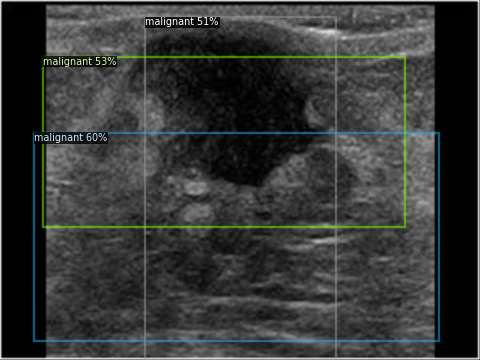

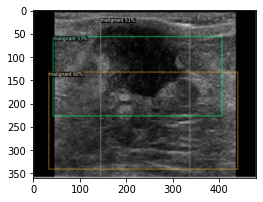

In [77]:
v = Visualizer(img, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()) 
plt.figure(figsize = (4, 6)) 
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)) 
